## Customer Churn 


**Prediction of Customer who have decided to end their relationship with their existing company. In our case study, we will be working on a churn dataset**

**Project Details**

    1. ML-Domain - Classification
    2. Library Covered - SkLearn - Logistic Regression, Decision Tree,RandomForest, Adaboost, Gradient Boost, Imbalanced learn - SMOTE, Over Sampling, LIME

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'C:\\Users\\jbhsm\\Project_Pro\\Customer Churn Prediction Model using Decision Trees'

In [3]:
os.listdir('Data')

['data_regression.csv']

In [4]:
data_path=os.path.join('C:\\Users\\jbhsm\\Project_Pro\\Customer Churn Prediction Model using Decision Trees\\Data',os.listdir('Data')[0])

In [5]:
data_path

'C:\\Users\\jbhsm\\Project_Pro\\Customer Churn Prediction Model using Decision Trees\\Data\\data_regression.csv'

In [6]:
#Loading the data into the data frame

df=pd.read_csv(data_path)

In [7]:
df.head()

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  churn  
0                    4.0                       1    0.0  
1                    3.0                       2    0.0  
2                    4.0                       5    1.0  
3                    3.0                       3    0.0  
4                    3.0                       1    0.0

#### Inspecting the dataframe for Null values and dtypes

In [8]:
# check for the missing values and dataframes
def inspection(df):
    import pandas as pd
    import seaborn as sns
    print("Types of the variables we are working with:")
    print(df.dtypes) # dtypes

    print("Total Samples with missing values:")

    print(df.isnull().any(axis=1).sum()) # null values column wise

    print("Total Missing Values per Variable")
    print(df.isnull().sum())
    print("Map of missing values")
    sns.heatmap(df.isnull())

Types of the variables we are working with:
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
Total Samples with missing values:
82
Total Missing Values per Variable
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_

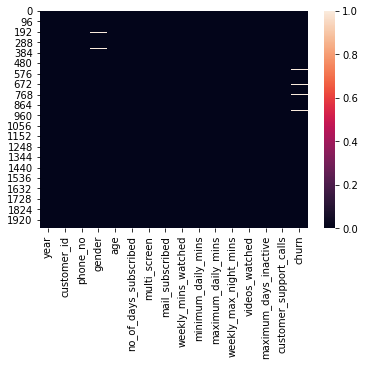

In [9]:
inspection(df)

In [10]:
cols_with_null = ['gender','maximum_days_inactive','churn']

In [11]:
index_set=set()

In [12]:
#Checking whether null values are in different rows or same rows having null values for 3 features
# In that case the percent of rows to be removed will be less
for col in cols_with_null:
    idx=df[df[col].isnull()==True].index.values
    index_set=index_set.union(set(idx))

In [13]:
len(index_set) # We can see that, null values are located in different rows in the three features.

82

In [14]:
perct_null_values=(df.isnull().sum().sum()/df.shape[0])*100
print("Percentage of Total number of occurances having Null values :", perct_null_values)

Percentage of Total number of occurances having Null values : 4.35


**Thoughts:**

    There are 4 features which as type object, and need to be converted to numerical before feeding into the model.
    There are some null values in the features - Gender, maximum_days_inactive and the in the target variable.
    The rows corresponding to Null values in the target class need to be excluded.

In [8]:
df = df.dropna() # cleaning up null values

**Encoding Categorical Variables**

In [9]:
cols_exclude=['customer_id','phone_no', 'year'] # These columns do not feed in any information.

In [10]:
import copy
df_1=copy.deepcopy(df)

In [11]:
# Categorical Features
cols=df_1.select_dtypes(include="object").columns.tolist()
cols

['phone_no', 'gender', 'multi_screen', 'mail_subscribed']

In [12]:
# Removing phone_no form the list of features to be encoded
cols.pop(0)
cols

['gender', 'multi_screen', 'mail_subscribed']

In [13]:
# function for encoding categorical variables
def encode_categories (df,variables):
    from sklearn.preprocessing import OrdinalEncoder
    ord_enc = OrdinalEncoder() 
    for v in variables:
        name = v+'_code' # add _code for encoded variables
        df[name] = ord_enc.fit_transform(df[[v]])
        print('The encoded values for '+ v + ' are:')
        print(df[name].unique())

In [14]:
encode_categories(df_1,cols)

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


In [15]:
df_1.head()

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  churn  gender_code  \
0                    4.0                       1    0.0          0.0   
1                    3.0                       2    0.0          0.0   
2                    4.0                       5    1.0          0.0   
3                    3.0                       3    0.0          0.0   
4                    3.0                       1    0.0          0.0   

   multi_screen_code  mail_subscribed_code  
0                0.0                   0.0  
1                0.0                   0.0  
2                0.0                   0.0  
3                0.0                   1.0  
4                0.0                   0.0

**Exploratory Data Analysis**

In [23]:
def plot_scatterplots (df,cols_to_exclude,class_col):
    #this function returns scatterplots of all the variables in the dataset
    #against the classification variable,
    #for a quick data visualization
    import numpy as np
    import seaborn as sns
    import warnings
    warnings.filterwarnings("ignore")
    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    for col in X.columns.difference([class_col]):
        g = sns.FacetGrid(df)
        g.map(sns.scatterplot, col, class_col)

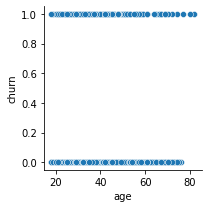

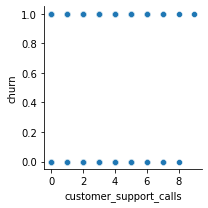

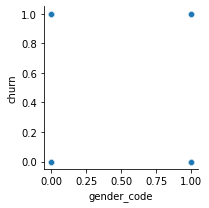

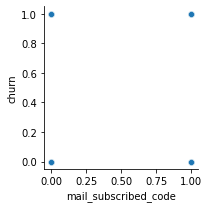

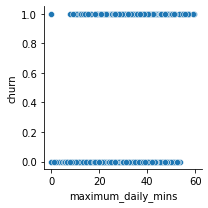

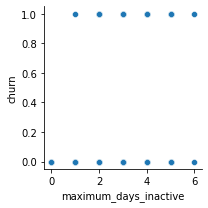

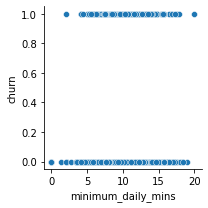

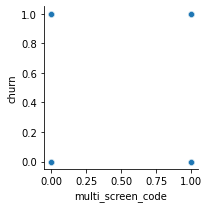

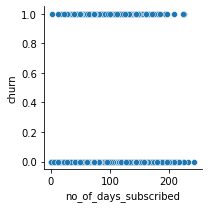

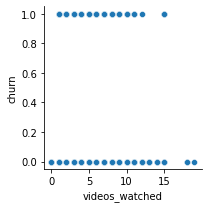

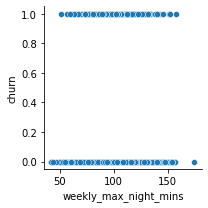

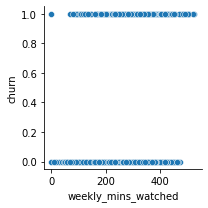

In [24]:
# plot - Visualization of all numeric features with respect to the target feature
plot_scatterplots (df_1,cols_exclude,'churn')

In [25]:
import seaborn as sns

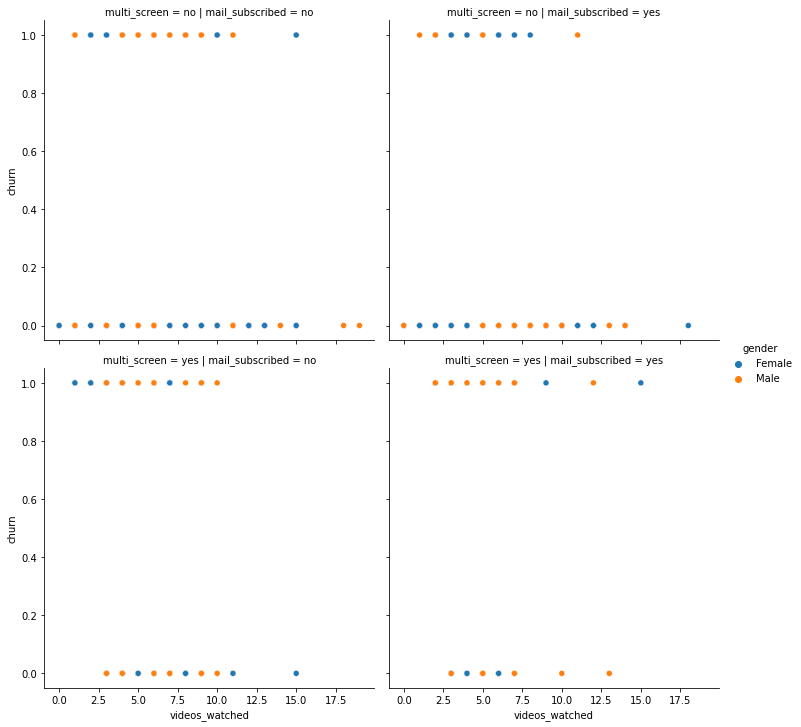

In [26]:
# Another way to visualise thru relational plot - also capturing other attributes together in hue, row and cols
sns.relplot(data=df_1, x="videos_watched", y="churn", hue="gender",col="mail_subscribed",row="multi_screen")

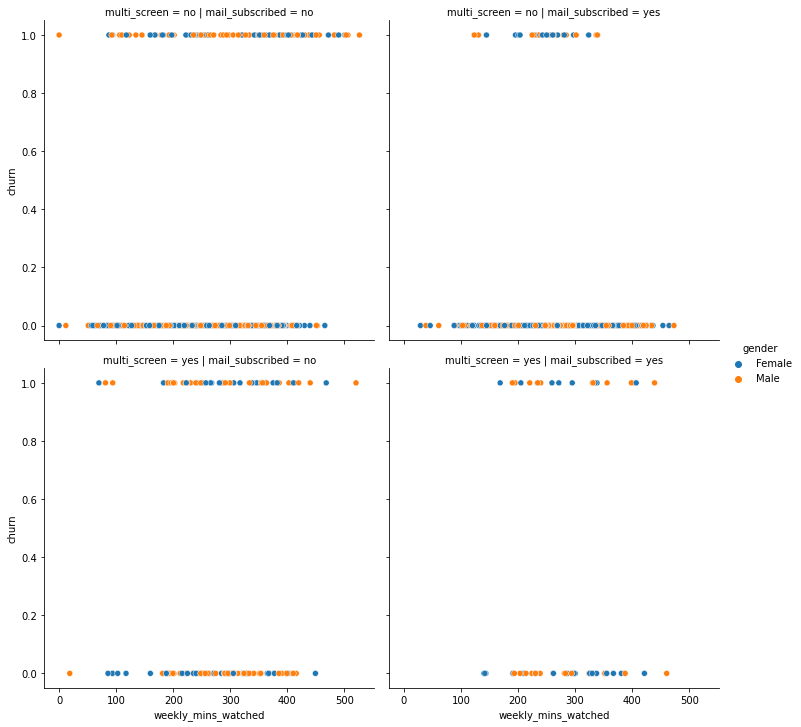

In [134]:
sns.relplot(data=df_1, x="weekly_mins_watched", y="churn", hue="gender",col="mail_subscribed",row="multi_screen")

In [27]:
# Full diagnostif to plot all features against all features - Pairplot
def full_diagnostic(df,class_col,cols_to_exclude):
    import seaborn as sns
    import numpy as np
    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    sns.pairplot(df,hue = class_col)

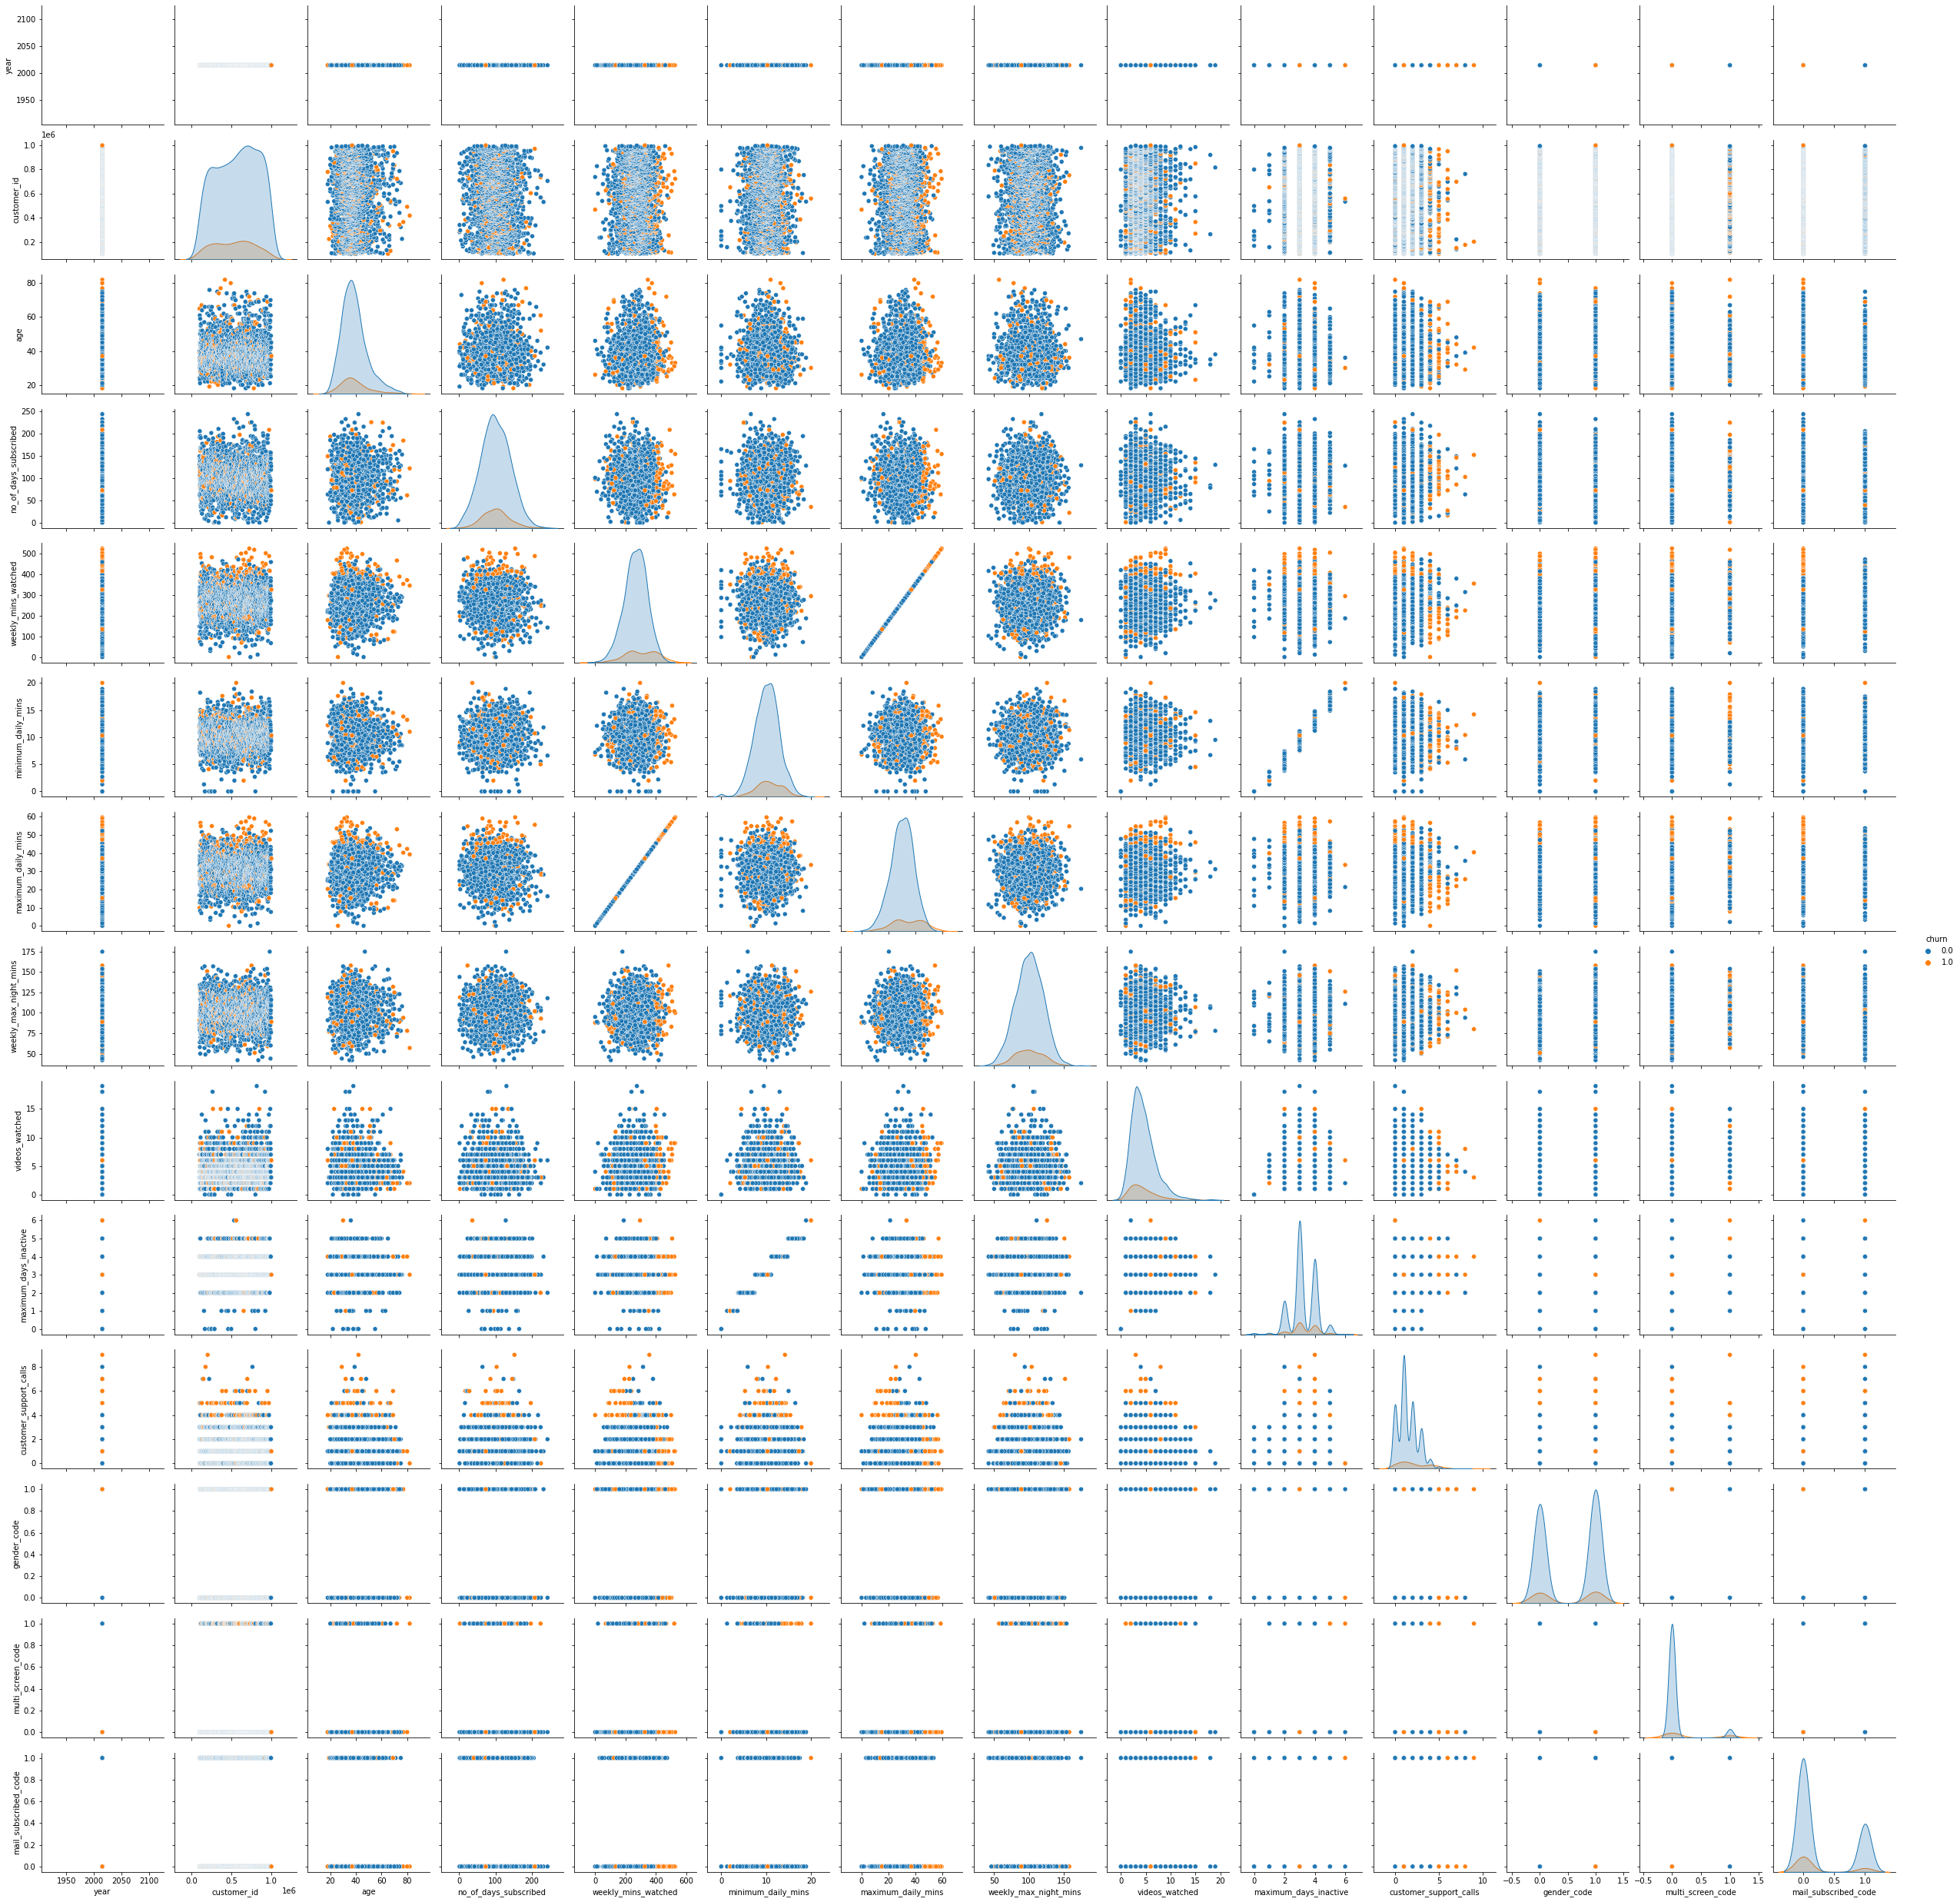

In [137]:
full_diagnostic(df_1,'churn',cols_exclude)

**Thoughts**
    
    We can see that in the plot of weekly_mins_watched vs weekly_max_night_mins, most of the churning observed for higher weekly_mins_watched cases
    This is counter intuitive. This may happen, when the customer is using the grace period (Free period) and then unsubscribing after.
    The churning customers are generally found distributed.

In [138]:
# function for creating plots for selective columns only
def selected_diagnotic(df,class_col,cols_to_eval):
    import seaborn as sns
    cols_to_eval.append(class_col) 
    X = df[cols_to_eval] # only selective columns
    sns.pairplot(X,hue = class_col) # plot

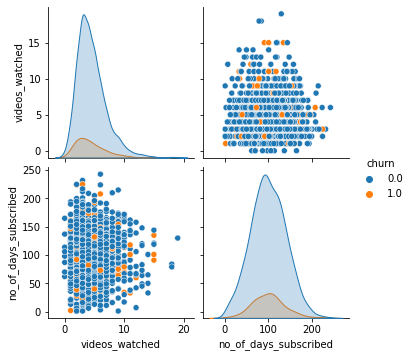

In [140]:
selected_diagnotic(df_1,class_col = 'churn',cols_to_eval = ['videos_watched','no_of_days_subscribed'])

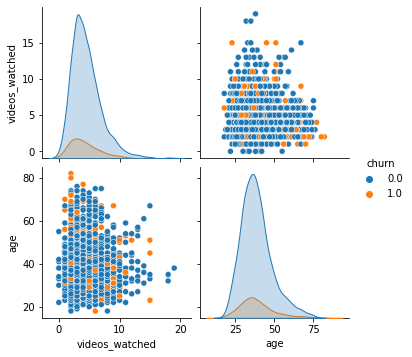

In [141]:
selected_diagnotic(df_1,class_col = 'churn',cols_to_eval = ['videos_watched','age'])

**Baseline Model Creation - Logistic Regression**

In [28]:
def logistic_regression(df,class_col,cols_to_exclude):
    import statsmodels.api as sm
    import numpy as np
    cols=df.select_dtypes(include=np.number).columns.tolist() 
    X=df[cols]
    X = X[X.columns.difference([class_col])] 
    X = X[X.columns.difference(cols_to_exclude)] # unwanted columns 
   
    y=df[class_col] # the target variable 
    logit_model=sm.Logit(y,X) 
    result=logit_model.fit() # fit the model 
    print(result.summary2()) # check for summary 
    return logit_model

In [29]:
model_stat_mod=logistic_regression(df_1,'churn',cols_exclude)

Optimization terminated successfully.
         Current function value: 0.336585
         Iterations 7
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.137     
Dependent Variable:   churn              AIC:                1315.1404 
Date:                 2022-04-30 20:07   BIC:                1381.8488 
No. Observations:     1918               Log-Likelihood:     -645.57   
Df Model:             11                 LL-Null:            -748.02   
Df Residuals:         1906               LLR p-value:        7.1751e-38
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
age                    -0.0208   0.0068 -3.0739 0.0021  -0.0340

In [183]:
# Impact of feature on the churning of customer - here we also need to note the Pseudo R-Squared value, which is only 0.137
import math

print("Variance in probability of odds in favour of churning for viewers having multi_screen : ",round(math.exp(1.9511),3))
print("Variance in probability of odds in favour of churning for viewers having customer_support_calls : ",round(math.exp(0.4246),3))


Variance in probability of odds in favour of churning for viewers having multi_screen :  7.036
Variance in probability of odds in favour of churning for viewers having customer_support_calls :  1.529


In [16]:
def prepare_model(df,class_col,cols_to_exclude):
    ## Split in training and test set
    from sklearn.model_selection import train_test_split
    import numpy as np
    ##Selecting only the numerical columns and excluding the columns we specified in the function
    cols=df.select_dtypes(include=np.number).columns.tolist() 
    X=df[cols]
    X = X[X.columns.difference([class_col])] 
    X = X[X.columns.difference(cols_to_exclude)]
    ##Selecting y as a column
    y=df[class_col]
    global X_train, X_test, y_train, y_test #This allow us to do call these variables outside this function
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # perform train test split

In [18]:
def run_model(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg #Defines the logistic model as a global model that can be used outside of this function
    ##Fitting the logistic regression
    logreg = LogisticRegression(random_state = 13)
    logreg.fit(X_train, y_train) # fit the model
    ##Predicting y values
    global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
    y_pred = logreg.predict(X_test) # make predictions on th test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
    print(classification_report(y_test, y_pred)) # check for classification report 
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # check for  AUC

In [19]:
# Creating Training Data and Test Data
prepare_model(df_1,'churn',cols_exclude)

In [20]:
#Scikit Learn - Logistic Regression
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       513
         1.0       0.47      0.13      0.20        63

    accuracy                           0.89       576
   macro avg       0.69      0.55      0.57       576
weighted avg       0.85      0.89      0.86       576

The area under the curve is: 0.55


**Thoughts**

    Logistic Regression model calculated from Scikit learn is considered as Baseline model
    Other model will be compared against this model.

In [34]:
def confusion_matrix(y_test,y_pred):
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred) # confusion matrix 
    print(confusion_matrix)

    tn, fp, fn, tp = confusion_matrix.ravel()
    print('TN: %0.2f'% tn)
    print('TP: %0.2f'% tp)
    print('FP: %0.2f'%fp)
    print('FN: %0.2f'%fn)

In [102]:
def roc_curve (model,X_test,y_test):
    import matplotlib.pyplot as plt 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test)) # ROC AUC score 
    fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)) # ROC curve
    #Setting the graph area
    plt.figure()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    #Plotting the worst line possiple
    plt.plot([0, 1], [0, 1],'b--')

    #Plotting the logistic regression we have built
    plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression (area = %0.2f)' % model_roc_auc)

    #Adding labels and etc
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

In [36]:
confusion_matrix(y_test,y_pred)

[[504   9]
 [ 55   8]]
TN: 504.00
TP: 8.00
FP: 9.00
FN: 55.00


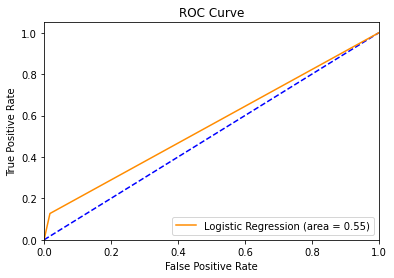

In [37]:
roc_curve (logreg,X_test,y_test)

**Saving and Loading the Model**

In [219]:
# save the model using pickle function 
import pickle
pickle.dump(logreg, open('model1.pkl', 'wb'))

In [220]:
# load the saved model 
model = pickle.load(open('model1.pkl', 'rb'))

In [221]:
# make predictions on the test data
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

**Understanding Class Imbalance in order to improve the model**

In [222]:
# Target Class Distribution
df_1.churn.value_counts(normalize=True)

0.0    0.868092
1.0    0.131908
Name: churn, dtype: float64

**Thoughts**

    1 The area under the curve that we witness is only 55%. Which is poor.
    
    2. We also note from above that target class is highly imbalanced. 
    
    3. Only 13% of the observation are their to train the model with customers who opted to churn.
    
    4. Existing model need to be equiped to handle this imbalance or the feed data may be re-sampleed to that this can be taken care of.

In [38]:
# class imbalance method 1 
def run_model_bweights(X_train,X_test,y_train,y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight = 'balanced') # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test)) # ROC AUC score
    print(classification_report(y_test, y_pred)) 
    print("The area under the curve is: %0.2f"%logit_roc_auc) # AUC curve

In [39]:
run_model_bweights(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       513
         1.0       0.27      0.78      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.76      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is: 0.76


**Thoughts - Logistic Regression - class_weight - 'balanced'**

    Compared to the baseline model area under the curve increased from 55% to 76%
    Recall for Churn Class imporved from 13% to 78%
    Precision reduced from 47% to 27%
    Overall F1 score imporved from 20% to 40%
    More methods need to be tried to check, how we can improve the the precision, which are required to correctly predict the churn class.
    

In [40]:
# class imbalance method 2
def run_model_aweights(X_train,X_test,y_train,y_test,w):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score,classification_report
    global logreg
    logreg = LogisticRegression(random_state = 13,class_weight=w) # define class_weight parameter
    logreg.fit(X_train, y_train) # fit the model 
    global y_pred
    y_pred = logreg.predict(X_test) # predict on test data
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))  # ROC AUC score
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%logit_roc_auc)  # AUC curve

In [41]:
run_model_aweights(X_train,X_test,y_train,y_test,{0:10, 1:90}) # Weight may be adequately adjusted

              precision    recall  f1-score   support

         0.0       0.99      0.61      0.75       513
         1.0       0.23      0.94      0.37        63

    accuracy                           0.65       576
   macro avg       0.61      0.77      0.56       576
weighted avg       0.90      0.65      0.71       576

The area under the curve is: 0.77


In [234]:
confusion_matrix(y_test,y_pred)

[[313 200]
 [  4  59]]
TN: 313.00
TP: 59.00
FP: 200.00
FN: 4.00


**Thoughts**

    1. Area under the curve has significantly imporve in manually providing the weight for the classes.
    2. There has been significant imporvement in Recall value from 13 to 94 almost 86% improvement, which indicate, falsely identifying labelling a customer - that he/she would churn is less.
    3. F1 score isnot impressive, rate to false position is very high - which is reflected in precision. as well as in this metrics
    4. Precision score has also reduced from 47% to 23%

In [17]:
# class imbalance method 3
def adjust_imbalance (X_train,y_train,class_col):
    from sklearn.utils import resample
    import pandas as pd
    X = pd.concat([X_train, y_train], axis=1)

    # separate the 2 classes
    class0 = X[X[class_col]==0]
    class1 = X[X[class_col]==1]

    # Case 1 - bootstraps from the minority class
    if len(class1)<len(class0):
        resampled = resample(class1,
                              replace=True, 
                              n_samples=len(class0), 
                              random_state=10) 
        resampled_df = pd.concat([resampled, class0])

    # Case 1 - ressamples from the majority class
    else:
        resampled = resample(class0,
                                  replace=False, 
                                  n_samples=len(class1), 
                                  random_state=10) 
        resampled_df = pd.concat([class0,resampled])

    return resampled_df

In [21]:
resampled_df = adjust_imbalance (X_train,y_train,class_col = 'churn')

In [22]:
resampled_df.shape

(2304, 13)

In [45]:
resampled_df.churn.value_counts(normalize=True) # We can see that the dataset is balanced.

0.0    0.5
1.0    0.5
Name: churn, dtype: float64

In [46]:
prepare_model(resampled_df,'churn',cols_exclude)
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.72       339
         1.0       0.73      0.68      0.71       353

    accuracy                           0.71       692
   macro avg       0.71      0.71      0.71       692
weighted avg       0.71      0.71      0.71       692

The area under the curve is: 0.71


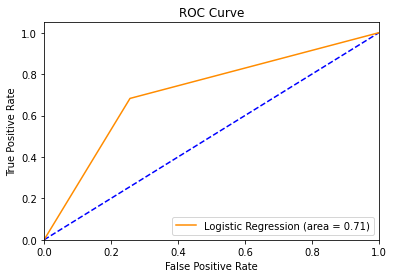

In [47]:
roc_curve (logreg,X_test,y_test)

**Thoughts**

    1. Here we can see that Precision has significantly improved 67% from 47%
    2. F1 Score has also significantly improved by 48%
    3. Overall area under the curve has also imporved from 55% to 71%
    

**SMOTE - Synthetic Minority Over-Sampling Technique**

In [39]:
def prepare_model_smote(df,class_col,cols_to_exclude):
    #Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input. 
    from sklearn.model_selection import train_test_split
    import numpy as np
    from imblearn.over_sampling import SMOTE
    cols=df.select_dtypes(include=np.number).columns.tolist() 
    X=df[cols]
    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]
    y=df[class_col]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    sm = SMOTE(random_state=0, sampling_strategy=0.95)
    X_train, y_train = sm.fit_resample(X_train, y_train) 

In [49]:
prepare_model_smote(df_1,'churn',cols_exclude)
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.77      0.85       513
         1.0       0.28      0.71      0.40        63

    accuracy                           0.76       576
   macro avg       0.62      0.74      0.63       576
weighted avg       0.88      0.76      0.80       576

The area under the curve is: 0.74


In [22]:
def prepare_model_oversampling(df,class_col,cols_to_exclude):
    #Random Over Sampler 
    from sklearn.model_selection import train_test_split
    import numpy as np
    from imblearn.over_sampling import RandomOverSampler
    from collections import Counter
    
    cols=df.select_dtypes(include=np.number).columns.tolist() 
    X=df[cols]
    X = X[X.columns.difference([class_col])]
    X = X[X.columns.difference(cols_to_exclude)]
    y=df[class_col]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    print('Original dataset shape %s' % Counter(y_train))
    ros = RandomOverSampler(random_state=0, sampling_strategy=0.95)
    X_train, y_train = ros.fit_resample(X_train, y_train) 
    print('Resampled dataset shape %s' % Counter(y_train))

In [34]:
prepare_model_oversampling(df_1,'churn',cols_exclude)
run_model(X_train,X_test,y_train,y_test)

Original dataset shape Counter({0.0: 1152, 1.0: 190})
Resampled dataset shape Counter({0.0: 1152, 1.0: 1094})
              precision    recall  f1-score   support

         0.0       0.94      0.71      0.80       513
         1.0       0.20      0.60      0.30        63

    accuracy                           0.69       576
   macro avg       0.57      0.65      0.55       576
weighted avg       0.86      0.69      0.75       576

The area under the curve is: 0.65


**Thoughts - SMOTE and Random Over Sampling**

    1. SMOTE performed bad compared to model with re-sampled data. 
    2. Here the precision came down to 20% for Class 1 
    3. F1 score reduced to 30%

**Feature Selection**

In [50]:
class_col = 'churn'
cols_to_exclude=['customer_id','phone_no', 'year']

# function for feature selection 
def var_threshold_selection(df,cols_to_exclude,class_col,threshold):
    from sklearn.feature_selection import VarianceThreshold
    import numpy as np
    from sklearn import preprocessing

    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    ## Scaling variables
    scaler = preprocessing.StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    var_thr = VarianceThreshold(threshold = threshold) #Removing both constant and quasi-constant
    var_thr.fit(X_scaled)
    var_thr.get_support()

    global selected_cols
    selected_cols = X.columns[var_thr.get_support()]

    print("The selected features are: ")
    print(list(selected_cols))

In [59]:
var_threshold_selection(df_1,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=1)

The selected features are: 
['maximum_daily_mins', 'maximum_days_inactive', 'weekly_mins_watched']


In [52]:
cols_to_include=['maximum_daily_mins', 'maximum_days_inactive', 'weekly_mins_watched']

In [53]:
cols_to_exclude=df_1.columns.difference(cols_to_include).tolist()

In [55]:
# cols_to_exclude=cols_to_exclude[0].values
print(cols_to_exclude)

['age', 'churn', 'customer_id', 'customer_support_calls', 'gender', 'gender_code', 'mail_subscribed', 'mail_subscribed_code', 'minimum_daily_mins', 'multi_screen', 'multi_screen_code', 'no_of_days_subscribed', 'phone_no', 'videos_watched', 'weekly_max_night_mins', 'year']


In [56]:
prepare_model(resampled_df,'churn',cols_to_exclude)

**At threshold level 1 for Variance Threshold**

In [57]:
run_model(X_train,X_test,y_train,y_test) # At threshold level 1

              precision    recall  f1-score   support

         0.0       0.57      0.62      0.59       339
         1.0       0.60      0.55      0.57       353

    accuracy                           0.58       692
   macro avg       0.58      0.58      0.58       692
weighted avg       0.59      0.58      0.58       692

The area under the curve is: 0.58


**At threshold level 0.99 for Variance threshold**

In [60]:
var_threshold_selection(df_1,cols_to_exclude=['customer_id','phone_no', 'year'],class_col = 'churn',threshold=0.99)

The selected features are: 
['age', 'customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_daily_mins', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code', 'no_of_days_subscribed', 'videos_watched', 'weekly_max_night_mins', 'weekly_mins_watched']


In [61]:
cols_to_include=['age', 'customer_support_calls', 'gender_code', 'mail_subscribed_code', 
                 'maximum_daily_mins', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code', 
                 'no_of_days_subscribed', 'videos_watched', 'weekly_max_night_mins', 'weekly_mins_watched']
cols_to_exclude=df_1.columns.difference(cols_to_include).tolist()
prepare_model(resampled_df,'churn',cols_to_exclude)

In [62]:
run_model(X_train,X_test,y_train,y_test) # At threshold level 0.99

              precision    recall  f1-score   support

         0.0       0.69      0.74      0.72       339
         1.0       0.73      0.68      0.71       353

    accuracy                           0.71       692
   macro avg       0.71      0.71      0.71       692
weighted avg       0.71      0.71      0.71       692

The area under the curve is: 0.71


In [64]:
print(cols_to_exclude)

['churn', 'customer_id', 'gender', 'mail_subscribed', 'multi_screen', 'phone_no', 'year']


In [65]:
confusion_matrix(y_test,y_pred)

[[252  87]
 [112 241]]
TN: 252.00
TP: 241.00
FP: 87.00
FN: 112.00


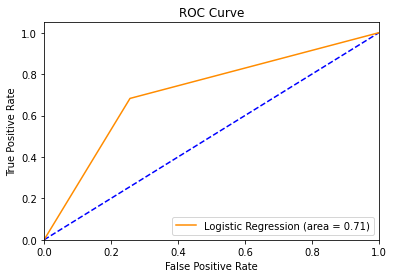

In [66]:
roc_curve (logreg,X_test,y_test)

**Thoughts**

    1. We can see that changing the threshold can change RUC Score
    2. A significant imporvement in precision from 47% to 72% has beemn observed.
    3. Recall improved from 13% to 68%
    4. F1 score imporved from 20% to 71%
    5. Overall area under the curve improved from 55% to 71%

**Recursive Feature Elimination - Another effort to select featire which contributes most in prediction**

In [67]:
# RFE for feature selection 
def rfe_selection(df,cols_to_exclude,class_col,model):
    import warnings
    warnings.filterwarnings("ignore")
    import numpy as np
    from sklearn.feature_selection import RFE

    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    y = df[class_col]

    rfe = RFE(model)
    rfe = rfe.fit(X, y) # fit the model 
    global selected_cols
    selected_cols = X.columns[rfe.support_]

    print("The selected features are: ")
    print(list(selected_cols))

In [68]:
rfe_selection(df_1,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

The selected features are: 
['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code']


In [69]:
cols_to_include=['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 
                 'minimum_daily_mins', 'multi_screen_code']
cols_to_exclude=df_1.columns.difference(cols_to_include).tolist()

In [71]:
print(cols_to_exclude)

['age', 'churn', 'customer_id', 'gender', 'mail_subscribed', 'maximum_daily_mins', 'multi_screen', 'no_of_days_subscribed', 'phone_no', 'videos_watched', 'weekly_max_night_mins', 'weekly_mins_watched', 'year']


In [72]:
prepare_model(resampled_df,'churn',cols_to_exclude)

In [73]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72       339
         1.0       0.75      0.58      0.65       353

    accuracy                           0.69       692
   macro avg       0.70      0.69      0.68       692
weighted avg       0.70      0.69      0.68       692

The area under the curve is: 0.69


**Thoughts - RFE**

    1. Here it is note worthy that precision obtained in this case is highest of 75% - 37% improvement.
    2. To be noted here that - in variance threshold as well in RFE - resampled data are being used.

**Decision Tree Classifier - Alternative technique to improve the model**

In [40]:
#Smote data to be taken as Input
prepare_model_smote(df_1,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [41]:
def run_model(X_train,X_test,y_train,y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import roc_auc_score,classification_report
    
    global dectree #Defines the logistic model as a global model that can be used outside of this function
    ##Fitting the logistic regression
    dectree = DecisionTreeClassifier(random_state = 13,criterion = 'entropy')
    dectree.fit(X_train, y_train)
    ##Predicting y values
    global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
    y_pred = dectree.predict(X_test)
    dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%dectree_roc_auc)

In [42]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92       513
         1.0       0.42      0.70      0.52        63

    accuracy                           0.86       576
   macro avg       0.69      0.79      0.72       576
weighted avg       0.90      0.86      0.88       576

The area under the curve is: 0.79


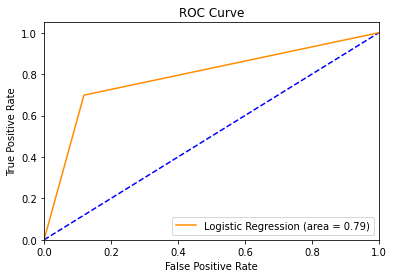

In [80]:
roc_curve (dectree,X_test,y_test)

**Decision Tree Model with Re-Sampled Data (50:50) and with features selected by RFE technique**

In [81]:
rfe_selection(df_1,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'],model=logreg)

The selected features are: 
['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 'minimum_daily_mins', 'multi_screen_code']


In [50]:
cols_to_include=['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 
                 'minimum_daily_mins', 'multi_screen_code']
cols_to_exclude=df_1.columns.difference(cols_to_include).tolist()

In [51]:
prepare_model(resampled_df,'churn',cols_to_exclude)

In [52]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88       339
         1.0       0.85      0.96      0.90       353

    accuracy                           0.89       692
   macro avg       0.90      0.89      0.89       692
weighted avg       0.90      0.89      0.89       692

The area under the curve is: 0.89


In [85]:
confusion_matrix(y_test,y_pred)

[[280  59]
 [ 15 338]]
TN: 280.00
TP: 338.00
FP: 59.00
FN: 15.00


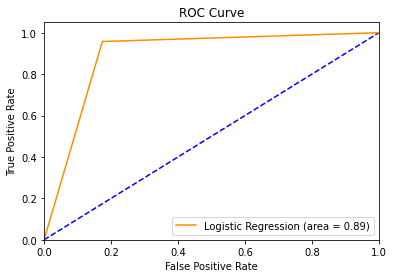

In [86]:
roc_curve (dectree,X_test,y_test)

**Thoughts - DT with RFE - Re-Sampled Data**

    Precision of Churn Class(1) has improved from 47% to 85% - Improved 45%
    Recall improved from 13% to 96% - Improved 86%
    F1 score improved from 20% to 90% - Improved 78%

**Thoughts**

    We will apply random forest on RFE-Re-Sampled data
    Apply Adaboost and Gradient Boost to see its impact on the model.

**Ensemble Technique - Random Forest with RFE features and re-Sampled Data**

In [109]:
# define the random forest model
def run_model(X_train,X_test,y_train,y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import roc_auc_score,classification_report
    global randomforest #Defines the random forest model as a global model that can be used outside of this function
    ##Fitting the random forest
    randomforest = RandomForestClassifier(max_depth=5)
    randomforest.fit(X_train, y_train)
    ##Predicting y values
    global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
    y_pred = randomforest.predict(X_test)
    randomforest_roc_auc = roc_auc_score(y_test, randomforest.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%randomforest_roc_auc)

In [110]:
cols_to_include=['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 
                 'minimum_daily_mins', 'multi_screen_code']
cols_to_exclude=df_1.columns.difference(cols_to_include).tolist()
prepare_model(resampled_df,'churn',cols_to_exclude)

In [111]:
# fit and run the random forest model; evaluate the corresponding metrics 
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.66      0.91      0.77       339
         1.0       0.87      0.56      0.68       353

    accuracy                           0.73       692
   macro avg       0.77      0.73      0.72       692
weighted avg       0.77      0.73      0.72       692

The area under the curve is: 0.73


In [89]:
# prepare the model
prepare_model_smote(df_1,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [90]:
# fit and run the random forest model; evaluate the corresponding metrics 
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       513
         1.0       0.57      0.81      0.67        63

    accuracy                           0.91       576
   macro avg       0.77      0.87      0.81       576
weighted avg       0.93      0.91      0.92       576

The area under the curve is: 0.87


### ADA Boost Model

In [113]:
# define an adaboost model
def run_model(X_train,X_test,y_train,y_test):
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.metrics import roc_auc_score,classification_report
    global adaboost #Defines the adaboost as a global model that can be used outside of this function
    ##Fitting the adaboost
    adaboost = AdaBoostClassifier(n_estimators = 100)
    adaboost.fit(X_train, y_train)
    ##Predicting y values
    global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
    y_pred = adaboost.predict(X_test)
    adaboost_roc_auc = roc_auc_score(y_test, adaboost.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%adaboost_roc_auc)

In [92]:
# fit and run the Adaboost model; evaluate the corresponding metrics - with SMOTE data
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       513
         1.0       0.51      0.54      0.52        63

    accuracy                           0.89       576
   macro avg       0.73      0.74      0.73       576
weighted avg       0.90      0.89      0.89       576

The area under the curve is: 0.74


**With Features selected thru RFE and using Re-Sampled Data**

In [114]:
cols_to_include=['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 
                 'minimum_daily_mins', 'multi_screen_code']
cols_to_exclude=df_1.columns.difference(cols_to_include).tolist()

In [115]:
prepare_model(resampled_df,'churn',cols_to_exclude)

In [116]:
# fit and run the Adaboost model; evaluate the corresponding metrics
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75       339
         1.0       0.78      0.65      0.71       353

    accuracy                           0.73       692
   macro avg       0.74      0.73      0.73       692
weighted avg       0.74      0.73      0.73       692

The area under the curve is: 0.73


**Thoughts**
   
    Adaboost model with Features selected thru RFE and with Re-Sampled data produced higher precision, Re-Call and F1 Score for the Churn Class compared to data obtained thru SMOTE.
    
    

### Gradient Boosting Model

In [118]:
# define an gradient boost model
def run_model(X_train,X_test,y_train,y_test):
    from sklearn.ensemble import GradientBoostingClassifier
    from sklearn.metrics import roc_auc_score,classification_report
    global gradientboost #Defines the logistic model as a global model that can be used outside of this function
    ##Fitting the logistic regression
    gradientboost = GradientBoostingClassifier()
    gradientboost.fit(X_train, y_train)
    ##Predicting y values
    global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
    y_pred = gradientboost.predict(X_test)
    gradientboost_roc_auc = roc_auc_score(y_test, gradientboost.predict(X_test))
    print(classification_report(y_test, y_pred))
    print("The area under the curve is: %0.2f"%gradientboost_roc_auc)

In [119]:
cols_to_include=['customer_support_calls', 'gender_code', 'mail_subscribed_code', 'maximum_days_inactive', 
                 'minimum_daily_mins', 'multi_screen_code']
cols_to_exclude=df_1.columns.difference(cols_to_include).tolist()

In [120]:
prepare_model(resampled_df,'churn',cols_to_exclude)

In [121]:
# fit and run the Gradient boost model; evaluate the corresponding metrics - with RFE and Re-Sampled Data
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.75      0.85      0.79       339
         1.0       0.83      0.72      0.77       353

    accuracy                           0.78       692
   macro avg       0.79      0.79      0.78       692
weighted avg       0.79      0.78      0.78       692

The area under the curve is: 0.79


## Evaluating Models

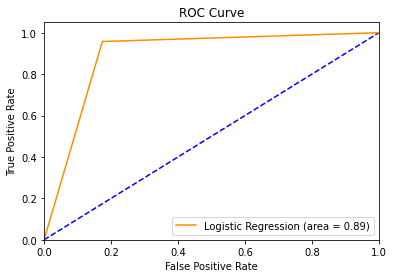

In [103]:
# ROC curve for decision tree model
roc_curve (dectree,X_test,y_test)

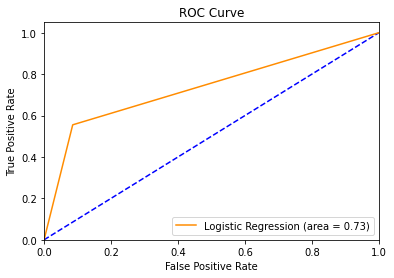

In [112]:
# ROC curve for random forest model
roc_curve (randomforest,X_test,y_test)

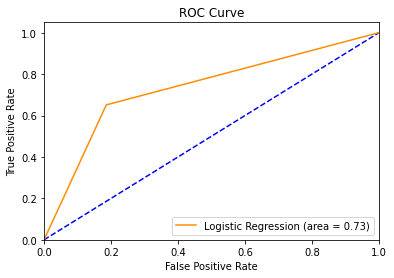

In [117]:
# ROC curve for adaboost model
roc_curve (adaboost,X_test,y_test)

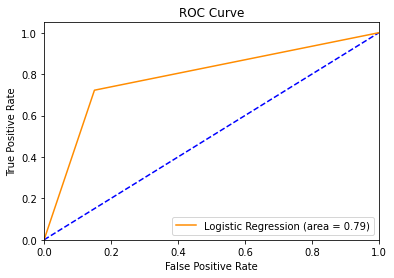

In [122]:
# ROC curve for gradient boost model
roc_curve (gradientboost,X_test,y_test)

### Plotting the Feature Importances and validating the same

In [125]:
import matplotlib.pyplot as plt

In [123]:
# define a function for plotting the feature importances
def plot_feature_importances(model):
    feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
    feature_importances = feature_importances.sort_values(axis=0, ascending=False)
    fig, ax = plt.subplots()
    feature_importances.plot.bar()
    ax.set_title("Feature importances")
    fig.tight_layout()

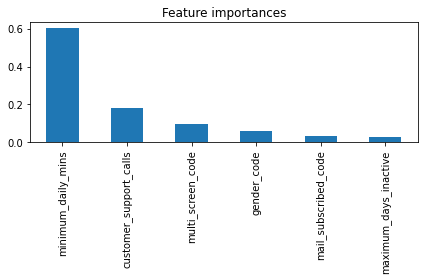

In [126]:
# feature importances for decision tree model
plot_feature_importances(dectree)

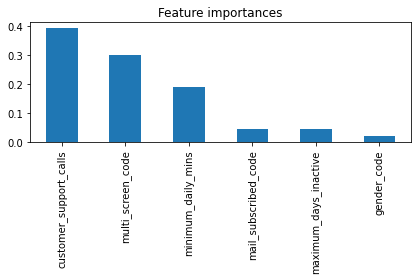

In [127]:
# feature importances for random forest model
plot_feature_importances(randomforest)

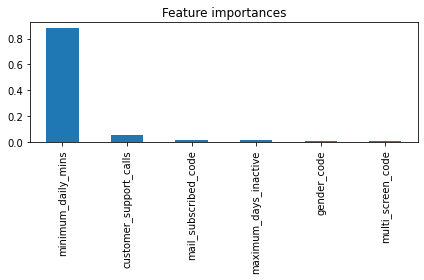

In [128]:
# feature importances for adaboost model
plot_feature_importances(adaboost)

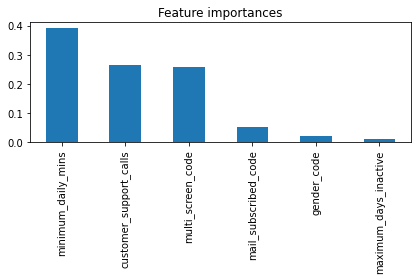

In [129]:
# feature importances for gradient boost model
plot_feature_importances(gradientboost)

**Thoughts**

    The best performinig model - Decision Tree - identifies minimum_daily_mins as most impotant feature, which is supported by Adaboost and Gradient Boost.
    Interesting gender do play some role in churning.
    How these features impacts Churning we'll try to find out6 thru LIME -Local Interpretable Model-agnostic Explanations

## LIME - Local Interpretable Model-agnostic Explanations

In [70]:
# define a function for lime - local interpretable model-agnostic explanations
def lime_explanation(model,X_train,X_test,class_names,chosen_index):
    import lime
    import lime.lime_tabular
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names = X_train.columns,class_names=class_names,kernel_width=5)
    choosen_instance = X_test.loc[[chosen_index]].values[0]
    exp = explainer.explain_instance(choosen_instance, lambda x: model.predict_proba(x).astype(float),num_features=6)
    exp.show_in_notebook(show_all=True)

In [67]:
# implement the lime function
lime_explanation(dectree,X_train,X_test,['Not Churn','Churn'],994)

In [68]:
# implement the lime function
lime_explanation(dectree,X_train,X_test,['Not Churn','Churn'],552)

In [69]:
# implement the lime function
lime_explanation(dectree,X_train,X_test,['Not Churn','Churn'],1296)

In [60]:
y_test.head()

994     1.0
305     0.0
522     0.0
383     0.0
1296    1.0
Name: churn, dtype: float64

In [72]:
# define a function for creating lime list
def lime_explanation_list(model,X_train,X_test,class_names,chosen_index):
    import lime
    import lime.lime_tabular
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names = X_train.columns,class_names=class_names,kernel_width=5)
    choosen_instance = X_test.loc[[chosen_index]].values[0]
    exp = explainer.explain_instance(choosen_instance, lambda x: model.predict_proba(x).astype(float),num_features=10)
    return exp.as_list()

In [73]:
# lime implementation results in form of a list
lime_explanation_list(dectree,X_train,X_test,['Not Churn','Churn'],1296)

[('customer_support_calls > 3.00', 0.3342977978902448),
 ('multi_screen_code <= 0.00', -0.2686340956098253),
 ('mail_subscribed_code <= 0.00', 0.10655711319076913),
 ('0.00 < gender_code <= 1.00', -0.04135482285111766),
 ('10.20 < minimum_daily_mins <= 12.30', -0.0131894064531179),
 ('maximum_days_inactive <= 3.00', -0.0017061289269665301)]

In [74]:
# lime implementation results in form of a list
lime_explanation_list(dectree,X_train,X_test,['Not Churn','Churn'],994)

[('multi_screen_code <= 0.00', -0.2666458862225752),
 ('mail_subscribed_code <= 0.00', 0.10264638433339597),
 ('customer_support_calls <= 1.00', -0.1002202846323438),
 ('0.00 < gender_code <= 1.00', -0.05807711253509325),
 ('minimum_daily_mins <= 8.30', -0.04102798086364154),
 ('maximum_days_inactive <= 3.00', 0.01279468861530163)]